[-0.09223298 -0.0040271   0.00923354  0.04898619 -0.01459936 -0.00646296
  0.03865369 -0.02695585  0.03075263 -0.00034881 -0.11678897 -0.01953206
 -0.0289173   0.00443631  0.04643512 -0.06103686 -0.03809642  0.04185975
  0.04312127 -0.00253547 -0.04123377 -0.05021314  0.02477815 -0.06452987
  0.04473457 -0.05807241  0.0779122   0.04911643 -0.03723906 -0.03253206
  0.03677639 -0.04197509 -0.028662    0.03346152  0.05859879 -0.04998216
 -0.05508833 -0.02957133 -0.06107376 -0.01135721 -0.07975267  0.07869645
  0.04197969  0.06171422 -0.0012321   0.00559683 -0.07745243  0.03278049
 -0.04404386 -0.14695991 -0.04203606 -0.00623205  0.00726635 -0.05578028
 -0.0116734   0.14883206  0.03038717  0.07173666  0.02000543 -0.03771295
 -0.05439028 -0.09329061 -0.00729612  0.08710251  0.03801401 -0.11376468
 -0.07836745 -0.08028012  0.05491497  0.01675885  0.05427165 -0.00702191
  0.04174535 -0.04951369  0.06829694 -0.01771289  0.01237802 -0.03726367
 -0.04432151 -0.05785737 -0.02412855 -0.06545698  0

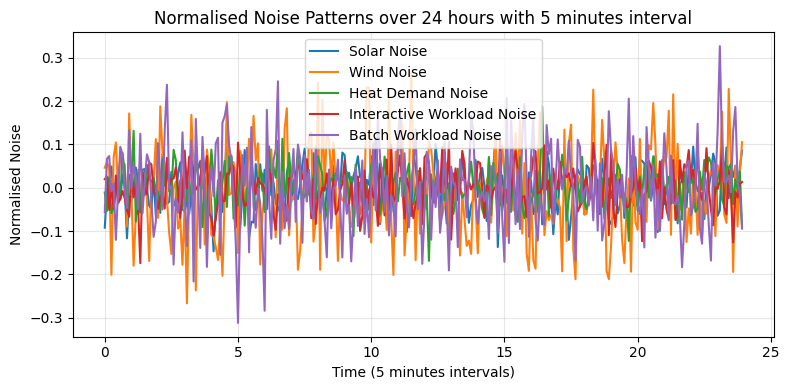

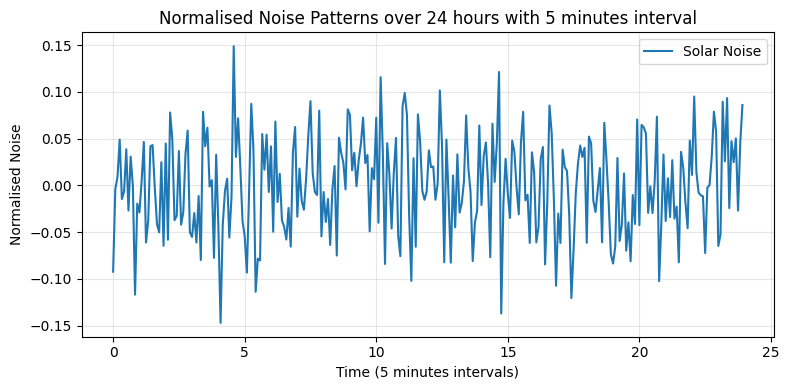

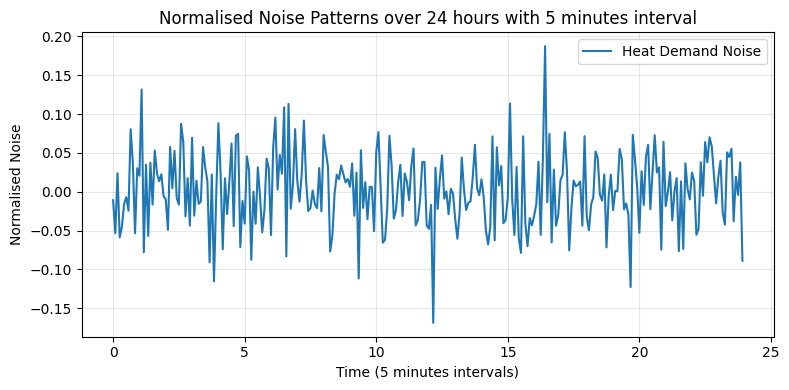

In [5]:
# this is a file for selected noise pattern for standardised testing
# this needed to be run only once to generate the noise files
import numpy as np
import pandas as pd
import constant_file as cf
import functions as ff

#number of data points
num_data_points = int(24*60/cf.interval)  # 24 hours with 5 minutes interval

# generation noise
# solar noise
# nomolised noise pattern for solar generation
solar_noise = np.random.normal(0, 0.05, num_data_points)  # 5% noise over 24 hours with 5 minutes interval
print(solar_noise)

# wind noise
wind_noise = np.random.normal(0, 0.1, num_data_points)  # 10% noise over 24 hours with 5 minutes interval

# heat demand noise
heat_noise = np.random.normal(0, 0.05, num_data_points)  # 5% noise over 24 hours with 5 minutes interval
window = 12   # e.g., smooth over 1 hour if 5-min steps
kernel = np.ones(window) / window
smooth_heat_noise = np.convolve(heat_noise, kernel, mode='same')


# workload noise
# interactive workload noise
interactive_workload_noise = np.random.normal(0, 0.05, num_data_points)  # 5% noise over 24 hours with 5 minutes interval

# data centre workload noise
batch_workload_noise = np.random.normal(0, 0.1, num_data_points)  # 10% noise over 24 hours with 5 minutes interval
# plot these normalised noise patterns

time_5min = np.arange(len(solar_noise)) / (60/cf.interval)  # time in hours

ff.plot_timeseries_multi(time_5min,
    [solar_noise, wind_noise, heat_noise, interactive_workload_noise, batch_workload_noise],
    labels=['Solar Noise', 'Wind Noise', 'Heat Demand Noise', 'Interactive Workload Noise', 'Batch Workload Noise'],
    title='Normalised Noise Patterns over 24 hours with 5 minutes interval',
    xlabel='Time (5 minutes intervals)',
    ylabel='Normalised Noise'
)   

ff.plot_timeseries_multi(time_5min,
    [solar_noise],
    labels=['Solar Noise'],
    title='Normalised Noise Patterns over 24 hours with 5 minutes interval',
    xlabel='Time (5 minutes intervals)',
    ylabel='Normalised Noise'
)   

ff.plot_timeseries_multi(time_5min,
    [heat_noise],
    labels=['Heat Demand Noise'],
    title='Normalised Noise Patterns over 24 hours with 5 minutes interval',
    xlabel='Time (5 minutes intervals)',
    ylabel='Normalised Noise'
)   

# save these noise pattern to single csv files
noise_patterns = {
    'solar_noise': solar_noise,
    'wind_noise': wind_noise,
    'heat_noise': heat_noise,
    'interactive_workload_noise': interactive_workload_noise,
    'batch_workload_noise': batch_workload_noise
}

pd.DataFrame(noise_patterns).to_csv('noise_patterns_5min.csv', index=False) 